In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv('Toilet_data.csv')

In [34]:
df.head()

,timestamp,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year
0,9/17/2024,32.9,13.6,31.2,normal,9.0,17.0,2024.0
1,2/14/2025,117.0,1.3,35.2,pee_detected,2.0,14.0,2025.0
2,5/14/2025,29.0,31.9,21.8,normal,5.0,14.0,2025.0
3,4/18/2025,30.8,9.5,35.2,normal,4.0,18.0,2025.0
4,1/19/2025,21.1,99.5,33.9,poop_detected,1.0,19.0,2025.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          3000 non-null   object 
 1   ammonia_ppm        3000 non-null   float64
 2   Hydrogen_Sulphide  3000 non-null   float64
 3   water_level_cm     3000 non-null   float64
 4   event_label        3000 non-null   object 
 5   date               1000 non-null   float64
 6   month              1000 non-null   float64
 7   year               1000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 187.6+ KB


In [36]:
df.describe()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,date,month,year
count,3000.000000,3000.000000,3000.000000,1000.000000,1000.000000,1000.000000
mean,23.617817,17.913514,33.411381,6.451000,15.746000,2024.650000
std,33.208517,27.438039,7.801790,3.446371,8.798005,0.477208
min,0.000504,0.001257,10.000000,1.000000,1.000000,2024.000000
25%,3.526172,1.909682,32.400000,3.000000,8.000000,2024.000000
50%,7.126244,3.717780,36.618664,6.000000,16.000000,2025.000000
75%,30.850000,22.800000,38.379575,10.000000,23.000000,2025.000000
max,119.800000,99.900000,40.000000,12.000000,31.000000,2025.000000


In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv("Toilet_data.csv")
df['ammonia_ppm'] = df['ammonia_ppm'].clip(lower=0, upper=120)
df['Hydrogen_Sulphide'] = df['Hydrogen_Sulphide'].clip(lower=0, upper=100)
df['water_level_cm'] = df['water_level_cm'].clip(lower=10, upper=40)
n_new = 2000

normal_data = pd.DataFrame({
    "timestamp": pd.date_range(start="2025-01-01", periods=n_new, freq="min"),
    "ammonia_ppm": np.random.uniform(0, 10, n_new),   # baseline NH3
    "Hydrogen_Sulphide": np.random.uniform(0, 5, n_new), # baseline H2S
    "water_level_cm": np.random.uniform(35, 40, n_new),  # stable tank
    "event_label": ["normal"] * n_new
})

df = pd.concat([df, normal_data], ignore_index=True)
print(df['event_label'].value_counts(normalize=True))
from sklearn.utils import resample
balanced = df.groupby('event_label', group_keys=False).apply(
    lambda x: resample(x, replace=True, n_samples=2000, random_state=42)
)
balanced = balanced.sample(frac=1, random_state=42).reset_index(drop=True)
balanced.to_csv("clean_balanced_dataset.csv", index=False)

print("✅ Balanced dataset saved as clean_balanced_dataset.csv")


event_label
normal           0.8958
poop_detected    0.0356
overuse          0.0352
flush_event      0.0248
pee_detected     0.0086
Name: proportion, dtype: float64
✅ Balanced dataset saved as clean_balanced_dataset.csv


C:\Users\shivam\AppData\Local\Temp\ipykernel_15268\4213342769.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced = df.groupby('event_label', group_keys=False).apply(


In [38]:
df.describe()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,date,month,year
count,5000.000000,5000.000000,5000.000000,1000.000000,1000.000000,1000.000000
mean,16.163217,11.769297,35.053701,6.451000,15.746000,2024.650000
std,27.355913,22.563660,6.433220,3.446371,8.798005,0.477208
min,0.000504,0.000775,10.000000,1.000000,1.000000,2024.000000
25%,2.982779,1.639077,35.517864,3.000000,8.000000,2024.000000
50%,6.152054,3.180869,37.106550,6.000000,16.000000,2025.000000
75%,9.179357,4.654920,38.544163,10.000000,23.000000,2025.000000
max,119.800000,99.900000,40.000000,12.000000,31.000000,2025.000000


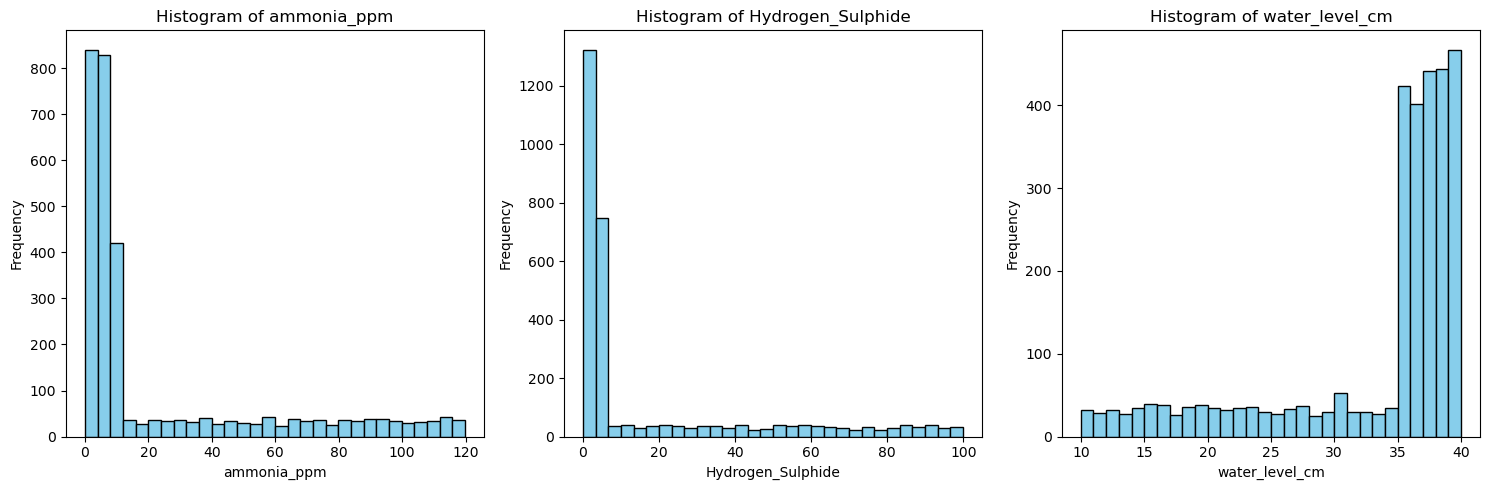

In [14]:
features = ["ammonia_ppm", "Hydrogen_Sulphide", "water_level_cm"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [39]:
df.head()

,timestamp,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year
0,9/17/2024,32.9,13.6,31.2,normal,9.0,17.0,2024.0
1,2/14/2025,117.0,1.3,35.2,pee_detected,2.0,14.0,2025.0
2,5/14/2025,29.0,31.9,21.8,normal,5.0,14.0,2025.0
3,4/18/2025,30.8,9.5,35.2,normal,4.0,18.0,2025.0
4,1/19/2025,21.1,99.5,33.9,poop_detected,1.0,19.0,2025.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          5000 non-null   object 
 1   ammonia_ppm        5000 non-null   float64
 2   Hydrogen_Sulphide  5000 non-null   float64
 3   water_level_cm     5000 non-null   float64
 4   event_label        5000 non-null   object 
 5   date               1000 non-null   float64
 6   month              1000 non-null   float64
 7   year               1000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [42]:
df.isnull().sum()

timestamp               0
ammonia_ppm             0
Hydrogen_Sulphide       0
water_level_cm          0
event_label             0
date                 4000
month                4000
year                 4000
dtype: int64

In [43]:
df.sample(10)

,timestamp,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year
3180,2025-01-01 03:00:00,3.454747,3.327393,37.463823,normal,NaN,NaN,NaN
122,4/26/2025,66.900000,13.800000,37.200000,normal,4.0,26.0,2025.0
4794,2025-01-02 05:54:00,9.243353,3.209363,37.898101,normal,NaN,NaN,NaN
2392,2025-01-01 23:12:00,4.192039,4.436498,37.428161,normal,NaN,NaN,NaN
830,3/8/2025,2.200000,97.100000,27.800000,poop_detected,3.0,8.0,2025.0
1724,2025-01-01 12:04:00,1.289376,1.715736,38.928132,normal,NaN,NaN,NaN
3638,2025-01-01 10:38:00,9.229534,4.228137,35.549940,normal,NaN,NaN,NaN
561,5/18/2025,17.900000,39.600000,39.700000,poop_detected,5.0,18.0,2025.0
1554,2025-01-01 09:14:00,6.510571,1.764229,39.634909,normal,NaN,NaN,NaN
2641,2025-01-02 03:21:00,3.942299,2.227893,39.650003,normal,NaN,NaN,NaN


In [26]:
def assign_event(row):
    if row['ammonia_ppm'] >= 25 and row['Hydrogen_Sulphide'] <= 5:
        return "pee_detected"
    elif row['Hydrogen_Sulphide'] >= 10 and row['ammonia_ppm'] < 25:
        return "poop_detected"
    elif row['water_level_cm'] <= 15:
        return "flush_event"
    elif row['ammonia_ppm'] > 120 or row['Hydrogen_Sulphide'] > 100:
        return "anomaly_sensor_error"
    elif row['ammonia_ppm'] > 80 and row['Hydrogen_Sulphide'] > 40:
        return "overuse"
    else:
        return "normal"

df['event_label'] = df.apply(
    lambda row: assign_event(row) if pd.isna(row['event_label']) or row['event_label']=="" else row['event_label'],
    axis=1
)
df.to_csv("Toilet_data.csv", index=False)

print("✅ Filled missing event_label values and saved as dataset_filled.csv")


✅ Filled missing event_label values and saved as dataset_filled.csv


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          5000 non-null   object 
 1   ammonia_ppm        5000 non-null   float64
 2   Hydrogen_Sulphide  5000 non-null   float64
 3   water_level_cm     5000 non-null   float64
 4   event_label        5000 non-null   object 
 5   date               1000 non-null   float64
 6   month              1000 non-null   float64
 7   year               1000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [46]:
import pandas as pd

# Convert to datetime (handles both date and datetime)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', dayfirst=True)

# Extract features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour     # will be 0 if no time present
df['minute'] = df['timestamp'].dt.minute
df['weekday'] = df['timestamp'].dt.day_name()


C:\Users\shivam\AppData\Local\Temp\ipykernel_15268\1225144215.py:4: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', dayfirst=True)


In [47]:
df.sample(10)

,timestamp,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year,day,hour,minute,weekday
587,2025-06-24 00:00:00,97.300000,87.900000,20.500000,overuse,6.0,6.0,2025.0,24.0,0.0,0.0,Tuesday
10,2025-07-24 00:00:00,93.400000,46.700000,13.400000,flush_event,7.0,7.0,2025.0,24.0,0.0,0.0,Thursday
3793,2025-01-01 13:13:00,6.755714,2.916628,36.420874,normal,NaN,1.0,2025.0,1.0,13.0,13.0,Wednesday
2671,NaT,2.141696,1.977473,39.661068,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,2025-08-05 00:00:00,24.000000,43.100000,15.900000,poop_detected,8.0,8.0,2025.0,5.0,0.0,0.0,Tuesday
1809,NaT,4.210865,4.931103,37.534692,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3730,2025-01-01 12:10:00,5.395058,0.521552,38.124904,normal,NaN,1.0,2025.0,1.0,12.0,10.0,Wednesday
3878,2025-01-01 14:38:00,9.755815,3.162498,35.927407,normal,NaN,1.0,2025.0,1.0,14.0,38.0,Wednesday
3589,2025-01-01 09:49:00,6.848118,0.581206,37.627341,normal,NaN,1.0,2025.0,1.0,9.0,49.0,Wednesday
4047,2025-01-01 17:27:00,7.567808,2.411337,39.372983,normal,NaN,1.0,2025.0,1.0,17.0,27.0,Wednesday


In [48]:
df.isnull().sum()

timestamp            2000
ammonia_ppm             0
Hydrogen_Sulphide       0
water_level_cm          0
event_label             0
date                 4000
month                2000
year                 2000
day                  2000
hour                 2000
minute               2000
weekday              2000
dtype: int64

In [49]:
invalid_ts = df[df['timestamp'].isna()]
print(invalid_ts.head(20))   # see first 20 problem rows


     timestamp  ammonia_ppm  Hydrogen_Sulphide  water_level_cm event_label  \
1000       NaT     1.173611           3.707733       38.081041      normal   
1001       NaT     9.688122           1.138075       35.031803      normal   
1002       NaT     0.606215           4.472699       35.654546      normal   
1003       NaT     0.420761           4.726819       38.630665      normal   
1004       NaT     9.937160           4.209684       37.177274      normal   
1005       NaT     4.555408           2.423778       37.154169      normal   
1006       NaT     1.319816           2.471277       35.348181      normal   
1007       NaT     4.689499           1.041062       39.034336      normal   
1008       NaT     9.891752           1.622577       37.358152      normal   
1009       NaT     2.682597           4.921292       38.019784      normal   
1010       NaT     0.588775           0.120873       37.416741      normal   
1011       NaT     4.127272           0.012378       38.228605  

In [50]:
# Try strict parsing first
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', dayfirst=True)

# If still NaT, try alternate formats
mask = df['timestamp'].isna()
df.loc[mask, 'timestamp'] = pd.to_datetime(df.loc[mask, 'timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')


In [51]:
df = df.dropna(subset=['timestamp'])


In [52]:
df['date'] = df['timestamp'].dt.date
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['weekday'] = df['timestamp'].dt.day_name()


In [55]:
df.sample(20)

,timestamp,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year,day,hour,minute,weekday
3059,2025-01-01 00:59:00,1.419642,0.297786,38.708891,normal,2025-01-01,1,2025,1,0,59,Wednesday
4704,2025-01-02 04:24:00,7.306902,3.898027,36.089024,normal,2025-01-02,1,2025,2,4,24,Thursday
4242,2025-01-01 20:42:00,5.670395,4.343125,35.531361,normal,2025-01-01,1,2025,1,20,42,Wednesday
4912,2025-01-02 07:52:00,7.384783,2.700899,38.368673,normal,2025-01-02,1,2025,2,7,52,Thursday
3947,2025-01-01 15:47:00,7.161842,3.382966,36.635521,normal,2025-01-01,1,2025,1,15,47,Wednesday
3079,2025-01-01 01:19:00,8.634314,4.649769,39.202915,normal,2025-01-01,1,2025,1,1,19,Wednesday
710,2025-01-18 00:00:00,97.800000,97.100000,24.800000,overuse,2025-01-18,1,2025,18,0,0,Saturday
4135,2025-01-01 18:55:00,9.791768,2.123259,39.951084,normal,2025-01-01,1,2025,1,18,55,Wednesday
269,2025-03-04 00:00:00,24.400000,88.900000,18.100000,poop_detected,2025-03-04,3,2025,4,0,0,Tuesday
586,2024-12-02 00:00:00,103.500000,9.800000,32.900000,normal,2024-12-02,12,2024,2,0,0,Monday


In [56]:
df.isnull().sum()

timestamp            0
ammonia_ppm          0
Hydrogen_Sulphide    0
water_level_cm       0
event_label          0
date                 0
month                0
year                 0
day                  0
hour                 0
minute               0
weekday              0
dtype: int64

In [57]:
print(df['event_label'].value_counts(normalize=True))


event_label
normal           0.826333
poop_detected    0.059333
overuse          0.058667
flush_event      0.041333
pee_detected     0.014333
Name: proportion, dtype: float64


In [58]:
from sklearn.utils import resample

# Target count per class (example: 2000 rows each)
target = 2000

balanced_df = df.groupby('event_label', group_keys=False).apply(
    lambda x: resample(x, replace=True, n_samples=target, random_state=42)
)

# Shuffle
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['event_label'].value_counts(normalize=True))


event_label
pee_detected     0.2
overuse          0.2
flush_event      0.2
normal           0.2
poop_detected    0.2
Name: proportion, dtype: float64


C:\Users\shivam\AppData\Local\Temp\ipykernel_15268\1513169193.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('event_label', group_keys=False).apply(


In [59]:
df.sample(20)

,timestamp,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year,day,hour,minute,weekday
3425,2025-01-01 07:05:00,1.837124,2.391272,38.432382,normal,2025-01-01,1,2025,1,7,5,Wednesday
4309,2025-01-01 21:49:00,4.199251,4.569959,37.385237,normal,2025-01-01,1,2025,1,21,49,Wednesday
4876,2025-01-02 07:16:00,5.573736,4.150616,37.155255,normal,2025-01-02,1,2025,2,7,16,Thursday
4962,2025-01-02 08:42:00,8.093017,0.555527,35.627308,normal,2025-01-02,1,2025,2,8,42,Thursday
281,2025-03-09 00:00:00,70.300000,28.900000,39.300000,normal,2025-03-09,3,2025,9,0,0,Sunday
665,2025-06-26 00:00:00,17.200000,64.200000,33.400000,poop_detected,2025-06-26,6,2025,26,0,0,Thursday
4899,2025-01-02 07:39:00,1.366738,2.128636,36.220799,normal,2025-01-02,1,2025,2,7,39,Thursday
4669,2025-01-02 03:49:00,1.060301,0.745628,39.098071,normal,2025-01-02,1,2025,2,3,49,Thursday
3545,2025-01-01 09:05:00,4.278031,1.271140,38.603315,normal,2025-01-01,1,2025,1,9,5,Wednesday
798,2025-02-01 00:00:00,24.700000,83.600000,20.600000,poop_detected,2025-02-01,2,2025,1,0,0,Saturday


In [60]:
df = df.drop(columns=['timestamp'])


In [61]:
df.head()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year,day,hour,minute,weekday
0,32.9,13.6,31.2,normal,2024-09-17,9,2024,17,0,0,Tuesday
1,117.0,1.3,35.2,pee_detected,2025-02-14,2,2025,14,0,0,Friday
2,29.0,31.9,21.8,normal,2025-05-14,5,2025,14,0,0,Wednesday
3,30.8,9.5,35.2,normal,2025-04-18,4,2025,18,0,0,Friday
4,21.1,99.5,33.9,poop_detected,2025-01-19,1,2025,19,0,0,Sunday


In [62]:
from sklearn.preprocessing import LabelEncoder

le_event = LabelEncoder()
df['event_label_encoded'] = le_event.fit_transform(df['event_label'])

print(dict(zip(le_event.classes_, le_event.transform(le_event.classes_))))


{'flush_event': np.int64(0), 'normal': np.int64(1), 'overuse': np.int64(2), 'pee_detected': np.int64(3), 'poop_detected': np.int64(4)}


In [63]:
df.head()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year,day,hour,minute,weekday,event_label_encoded
0,32.9,13.6,31.2,normal,2024-09-17,9,2024,17,0,0,Tuesday,1
1,117.0,1.3,35.2,pee_detected,2025-02-14,2,2025,14,0,0,Friday,3
2,29.0,31.9,21.8,normal,2025-05-14,5,2025,14,0,0,Wednesday,1
3,30.8,9.5,35.2,normal,2025-04-18,4,2025,18,0,0,Friday,1
4,21.1,99.5,33.9,poop_detected,2025-01-19,1,2025,19,0,0,Sunday,4


In [64]:
le_week = LabelEncoder()
df['weekday_encoded'] = le_week.fit_transform(df['weekday'])


In [65]:
df.head()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,event_label,date,month,year,day,hour,minute,weekday,event_label_encoded,weekday_encoded
0,32.9,13.6,31.2,normal,2024-09-17,9,2024,17,0,0,Tuesday,1,5
1,117.0,1.3,35.2,pee_detected,2025-02-14,2,2025,14,0,0,Friday,3,0
2,29.0,31.9,21.8,normal,2025-05-14,5,2025,14,0,0,Wednesday,1,6
3,30.8,9.5,35.2,normal,2025-04-18,4,2025,18,0,0,Friday,1,0
4,21.1,99.5,33.9,poop_detected,2025-01-19,1,2025,19,0,0,Sunday,4,3


In [69]:
if 'event_label' in df.columns:
    df = df.drop(columns=['event_label'])    
if 'weekday' in df.columns:
    df = df.drop(columns=['weekday'])

In [70]:
df.head()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,date,month,year,day,hour,minute,event_label_encoded,weekday_encoded
0,32.9,13.6,31.2,2024-09-17,9,2024,17,0,0,1,5
1,117.0,1.3,35.2,2025-02-14,2,2025,14,0,0,3,0
2,29.0,31.9,21.8,2025-05-14,5,2025,14,0,0,1,6
3,30.8,9.5,35.2,2025-04-18,4,2025,18,0,0,1,0
4,21.1,99.5,33.9,2025-01-19,1,2025,19,0,0,4,3


In [71]:
df = df.drop(columns=['date'])


In [73]:
df.head()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,month,year,day,hour,minute,event_label_encoded,weekday_encoded
0,32.9,13.6,31.2,9,2024,17,0,0,1,5
1,117.0,1.3,35.2,2,2025,14,0,0,3,0
2,29.0,31.9,21.8,5,2025,14,0,0,1,6
3,30.8,9.5,35.2,4,2025,18,0,0,1,0
4,21.1,99.5,33.9,1,2025,19,0,0,4,3


In [ ]:
df.to_csv("T.csv", index=False)